In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Task 1

In [17]:
sample_size = 30
experiment_samples = 1000000

In [18]:
samples = np.random.exponential(scale=1, size=(experiment_samples, sample_size))

In [19]:
sample_mean = np.mean(samples, axis=1)

In [20]:
bias = np.mean(1/sample_mean) - 1
std = np.std(1/sample_mean, ddof=1)

In [21]:
round(bias, 4), round(std, 4)

(0.0345, 0.1956)

### Task 2

In [24]:
data = np.array([(576, 3.39), (635, 3.30), (558, 2.81), (578, 3.03), (666, 3.44),
                 (580, 3.07), (555, 3.0), (661, 3.43), (651, 3.36), (605, 3.13),
                 (653, 3.12), (575, 2.74), (545, 2.76), (572, 2.88), (594, 2.96)])

In [38]:
def bootstrap_corr(sample, number_of_trials: int):
    n = len(sample)
    corrs = np.zeros(number_of_trials)
    
    for _ in range(number_of_trials):
        bootstrap_sample = sample[np.random.choice(n, size=n, replace=True)]
        corr_matrix = np.corrcoef(bootstrap_sample, rowvar=False)[0, 1]
        corrs[_] = corr_matrix

    return corrs

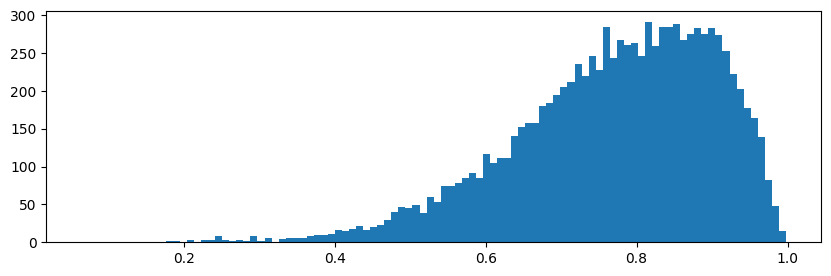

In [39]:
corrs = bootstrap_corr(data, 10000)

plt.figure(figsize=(10, 3))
plt.hist(corrs, bins=100)
plt.show()

### Task 3

In [25]:
def std_vanilla(n, w, m_u_n, sigma2_a, m_u_f, sigma2_f, number_of_trials):
    n_m = np.random.binomial(n, w, size=number_of_trials)
    
    weighted_sum_men = np.random.normal(n_m * m_u_n, np.sqrt(n_m * sigma2_a))
    weighted_sum_women = np.random.normal((n - n_m) * m_u_f, np.sqrt((n - n_m) * sigma2_f))

    return np.std((weighted_sum_men + weighted_sum_women) / n)

In [28]:
def std_weighted(n, w, m_u_n, sigma2_a, m_u_f, sigma2_f, number_of_trials):
    n_m = np.random.binomial(n, w, size=number_of_trials)
    weighted_means = np.zeros(number_of_trials)
    
    for _ in range(number_of_trials):
        current_n_m = n_m[_]
        
        if current_n_m == n:
            weighted_means[_] = np.random.normal(m_u_n, np.sqrt(sigma2_a / n))
        elif current_n_m == 0:
            weighted_means[_] = np.random.normal(m_u_f, np.sqrt(sigma2_f / n))
        else:
            weighted_sum_men = np.random.normal(current_n_m * m_u_n, np.sqrt(current_n_m * sigma2_a))
            weighted_sum_women = np.random.normal((n - current_n_m) * m_u_f, np.sqrt((n - current_n_m) * sigma2_f))
            weighted_means[_] = (w * weighted_sum_men / current_n_m) + ((1 - w) * weighted_sum_women / (n - current_n_m))
    
    return np.std(weighted_means)

In [29]:
n = 30
w = 0.86 / 1.86
mu_m, sigma2_m = 176, 6 ** 2
mu_f, sigma2_f = 165, 5 ** 2
number_of_trials = 10000

print(std_vanilla(n, w, mu_m, sigma2_m, mu_f, sigma2_f, number_of_trials),
      std_weighted(n, w, mu_m, sigma2_m, mu_f, sigma2_f, number_of_trials))

1.4164415169201283 1.0179242448565915


### Task 4

In [13]:
def answer():
    return 2.0

def integrand(x, theta):
    diff = x - theta
    denominator = (1 + diff ** 2) ** 3
    numerator = 4 * diff ** 2
    return numerator / (math.pi * denominator)

### Task 5

In [16]:
# анлак